In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread

In [2]:
import os
import sys
module_path = os.path.abspath('src')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/ilya/Documents/kaggle_data-science-bowl-2018/src


In [3]:
from keras.models import load_model
from keras import backend as K
import tensorflow as tf
import data
import config
from rle_encodign import prob_to_rles
params = config.devbox

/home/ilya/.pyenv/versions/3.5.4/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
device = '/cpu:0'
# device = '/gpu:0'

In [6]:
!ls -alh /home/ilya/Data/bowl2018/output

total 48K
drwxrwxr-x 12 ilya ilya 4.0K Feb 19 23:14 .
drwxrwxr-x  6 ilya ilya 4.0K Feb 10 18:35 ..
drwxrwxr-x  2 ilya ilya 4.0K Feb 11 11:25 fusionnet--1518288980
drwxrwxr-x  2 ilya ilya 4.0K Feb  9 13:15 unet--1518151545
drwxrwxr-x  2 ilya ilya 4.0K Feb 10 07:50 unet--1518191019
drwxrwxr-x  2 ilya ilya 4.0K Feb 14 01:02 unet--1518546989
drwxrwxr-x  2 ilya ilya 4.0K Feb 14 10:55 unet--1518573406
drwxrwxr-x  2 ilya ilya 4.0K Feb 14 10:58 unet--1518584288
drwxrwxr-x  2 ilya ilya 4.0K Feb 14 11:00 unet--1518584408
drwxrwxr-x  2 ilya ilya 4.0K Feb 14 19:44 unet--1518593058
drwxrwxr-x  2 ilya ilya 4.0K Feb 15 05:51 unet--1518616890
drwxrwxr-x  2 ilya ilya 4.0K Feb 19 23:13 watershed--1519057320


In [44]:
!ls /home/ilya/Data/bowl2018/output/watershed--1519057320

weights-improvement-01-5800.30.hdf5  weights-improvement-05-5649.61.hdf5
weights-improvement-02-5771.77.hdf5  weights-improvement-06-5597.29.hdf5
weights-improvement-03-5722.80.hdf5  weights-improvement-07-5573.91.hdf5
weights-improvement-04-5659.30.hdf5  weights-improvement-08-5530.24.hdf5


In [45]:
with tf.device(device):
    model = load_model('/home/ilya/Data/bowl2018/output/watershed--1519057320/weights-improvement-08-5530.24.hdf5')

In [21]:
X_train, Y_train = data.make_train_df(params)
test_paths = data.make_test_df(params)

Find 670 train_ids
Find 65 test_ids


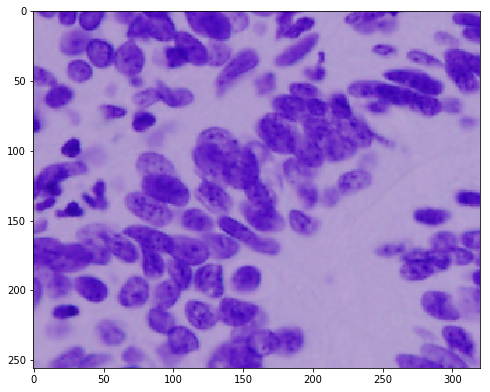

In [50]:
plt.figure(figsize=(8,15))
plt.imshow(imread(X_train[6]))

In [14]:
from data_loader.watershed_image_reader import WatershedImagesReader

In [15]:
reader = WatershedImagesReader(256,256)

In [29]:
imgs, sizes = reader.read(X_train[:10])

  0%|          | 0/10 [00:00<?, ?it/s]
0.00it [00:00, ?it/s]

0it [00:00, ?it/s]
 10%|█         | 1/10 [00:00<00:02,  3.61it/s]
0.00it [00:00, ?it/s]

0it [00:00, ?it/s]
 20%|██        | 2/10 [00:01<00:04,  1.94it/s]
0.00it [00:00, ?it/s]

0it [00:00, ?it/s]

0.00it [00:00, ?it/s]

0it [00:00, ?it/s]
 40%|████      | 4/10 [00:01<00:01,  3.43it/s]
0.00it [00:00, ?it/s]

0it [00:00, ?it/s]

0.00it [00:00, ?it/s]

0it [00:00, ?it/s]
 60%|██████    | 6/10 [00:01<00:00,  4.48it/s]
0.00it [00:00, ?it/s]

0it [00:00, ?it/s]
 70%|███████   | 7/10 [00:01<00:00,  4.53it/s]
0.00it [00:00, ?it/s]

0it [00:00, ?it/s]
 80%|████████  | 8/10 [00:01<00:00,  4.83it/s]
0.00it [00:00, ?it/s]

0it [00:00, ?it/s]

0.00it [00:00, ?it/s]

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:02<00:00,  4.01it/s]


In [46]:
preds = model.predict(imgs)

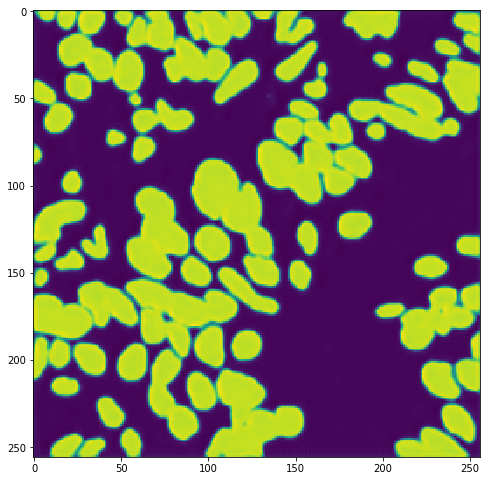

In [49]:
plt.figure(figsize=(8,15))
plt.imshow(preds[6,:,:,0])